# **EXTRA PROJECT**
## **Mask Detection use Yolo V2**

1.   **`Anggara Putra Pratama - 1101174240`**
2.   **`Regina Acintya P- 1101174141`**
3.   **`Muhammad Kemal Hernandi - 1101174169`**

[Github : Extra Project Mask Detection use YoloV2](https://github.com/anggaraputrapratama/YoloV2-MaskDetection)




# **1) Create** *yolov2-mask* **and** *training* **folder in your drive**

# **2) Mount drive, link your folder and navigate to /mydrive/yolov2-mask folder**

In [1]:
#mount drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive

# list the contents of /mydrive
#!ls /mydrive

#Navigate to /mydrive/yolov2-mask
%cd /mydrive/yolov2-mask

/
Mounted at /content/gdrive
/content/gdrive/My Drive/yolov2-mask


# **3) Clone `darknet` git repository** 

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15208, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15208 (delta 12), reused 18 (delta 9), pack-reused 15185
Receiving objects: 100% (15208/15208), 13.60 MiB | 7.86 MiB/s, done.
Resolving deltas: 100% (10320/10320), done.
Checking out files: 100% (2038/2038), done.


# **4) Create & upload the following files which we need for training a custom detector**


a.   `Labeled Custom Dataset` 

b.   `Custom cfg file`

c.   `obj.data and obj.names files` 

d.   `process.py file (to create train.txt and test.txt files for training)`


**I have uploaded my custom files on [GitHub](https://github.com/anggaraputrapratama/yolov2-custom-training).
I am working with 3 classes i.e. bad, good and none**




## **4(a) Upload the Labeled custom dataset *`obj.zip`* file to the *`yolov4`* folder on your drive**


Create the zip file **obj.zip** from the **obj** folder containing both the input image ".jpg" files and their corresponding YOLO format labeled ".txt" files. 

Upload the zip file to the ***yolov2-mask*** folder on your drive.

To know more about collecting datasets and labeling, read [Medium article](https://medium.com/@techzizou007/image-dataset-labeling-annotation-bec3390eda2d) on this.


# **5) Make changes in the `makefile` to enable OPENCV and GPU**

In [2]:
# change makefile to have GPU and OPENCV enabled
# also set CUDNN, CUDNN_HALF and LIBSO to 1

%cd darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/gdrive/My Drive/yolov2-mask/darknet


# **6) Run `make` command to build darknet**

In [3]:
# build darknet 
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

# **7) Copy all the files from the *`yolov2-mask`* folder to the darknet directory**

In [ ]:
# Clean the data and cfg folders first except the labels folder in data which is required

%cd data/
!find -maxdepth 1 -type f -exec rm -rf {} \;
%cd ..

%rm -rf cfg/
%mkdir cfg

/content/gdrive/My Drive/yolov2-mask/darknet/data
/content/gdrive/My Drive/yolov2-mask/darknet


In [ ]:
# Unzip the obj.zip dataset and its contents so that they are now in /darknet/data/ folder 

!unzip /mydrive/yolov2-mask/obj.zip -d data/

Archive:  /mydrive/yolov2-mask/obj.zip
   creating: data/obj/
  inflating: data/obj/1.jpg          
  inflating: data/obj/2.jpg          
  inflating: data/obj/3.jpg          
  inflating: data/obj/4.jpg          
  inflating: data/obj/5.jpg          
  inflating: data/obj/6.jpg          
  inflating: data/obj/7.jpg          
  inflating: data/obj/8.jpg          
  inflating: data/obj/9.jpg          
  inflating: data/obj/10.jpg         
  inflating: data/obj/11.jpg         
  inflating: data/obj/12.jpg         
  inflating: data/obj/13.jpg         
  inflating: data/obj/14.jpg         
  inflating: data/obj/15.jpg         
  inflating: data/obj/16.jpg         
  inflating: data/obj/17.jpg         
  inflating: data/obj/18.jpg         
  inflating: data/obj/19.jpg         
  inflating: data/obj/20.jpg         
  inflating: data/obj/21.jpg         
  inflating: data/obj/22.jpg         
  inflating: data/obj/23.jpeg        
  inflating: data/obj/24.jpg         
  inflating: data/obj/25.j

In [ ]:
# Copy the yolov2-custom.cfg file so that it is now in /darknet/cfg/ folder 

!cp /mydrive/yolov2-mask/yolov2-custom.cfg cfg

# verify if your custom file is in cfg folder
!ls cfg/

yolov2-custom.cfg


In [ ]:
# Copy the obj.names and obj.data files from your drive so that they are now in /darknet/data/ folder 

!cp /mydrive/yolov2-mask/yolov2-obj.names data
!cp /mydrive/yolov2-mask/yolov2-obj.data  data

# verify if the above files are in data folder
!ls data/

labels	obj  yolov2-obj.data  yolov2-obj.names


In [ ]:
# Copy the process.py file to the current darknet directory 

!cp /mydrive/yolov2-mask/process.py .

# **8) Run the *`process.py`* python script to create the *`train.txt`* & *`test.txt`* files inside the *data* folder**

In [ ]:
# run process.py ( this creates the train.txt and test.txt files in our darknet/data folder )
!python process.py

# list the contents of data folder to check if the train.txt and test.txt files have been created 
!ls data/

/content/gdrive/My Drive/yolov2-mask/darknet
labels	obj  test.txt  train.txt  yolov2-obj.data  yolov2-obj.names


# **9) Download the pre-trained *`yolov2`* weights**

In [ ]:
# Download the yolov2 pre-trained weights file
!wget http://pjreddie.com/media/files/darknet19_448.conv.23

--2021-07-04 07:12:09--  http://pjreddie.com/media/files/darknet19_448.conv.23
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet19_448.conv.23 [following]
--2021-07-04 07:12:09--  https://pjreddie.com/media/files/darknet19_448.conv.23
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79327120 (76M) [application/octet-stream]
Saving to: ‘darknet19_448.conv.23’

darknet19_448.conv. 100%[===================>]  75.65M  46.4MB/s    in 1.6s    

2021-07-04 07:12:11 (46.4 MB/s) - ‘darknet19_448.conv.23’ saved [79327120/79327120]



# **10) TRAINING**

## **Train your custom detector** 

For best results, you should stop the training when the average loss is less than 0.06 if possible or at least below 0.3, else train the model until the average loss does not show any significant change for a while.

[When should I stop training:](https://github.com/AlexeyAB/darknet/tree/47c7af1cea5bbdedf1184963355e6418cb8b1b4f#When-should-I-stop-training)

In [ ]:
# train your custom detector! (uncomment %%capture below if you run into memory issues or your Colab is crashing)
# %%capture

!./darknet detector train data/yolov2-obj.data cfg/yolov2-custom.cfg darknet19_448.conv.23 -dont_show -map

Streaming output truncated to the last 5000 lines.
Region Avg IOU: 0.696823, Class: 0.997821, Obj: 0.712934, No Obj: 0.007370, Avg Recall: 0.857143,  count: 28
Region Avg IOU: 0.678924, Class: 0.991174, Obj: 0.633543, No Obj: 0.006401, Avg Recall: 0.947368,  count: 19
Region Avg IOU: 0.570312, Class: 0.982651, Obj: 0.557685, No Obj: 0.007951, Avg Recall: 0.741379,  count: 58
Region Avg IOU: 0.560166, Class: 0.996737, Obj: 0.565006, No Obj: 0.006706, Avg Recall: 0.696970,  count: 33
Region Avg IOU: 0.603579, Class: 0.998138, Obj: 0.519635, No Obj: 0.005160, Avg Recall: 0.666667,  count: 21

 (next mAP calculation at 1900 iterations) 

 Tensor Cores are used.
 Last accuracy mAP@0.5 = 49.56 %, best = 49.56 % 
 1882: 0.533456, 0.699529 avg loss, 0.000100 rate, 2.453844 seconds, 120448 images, 2.869760 hours left
Loaded: 0.000044 seconds
Region Avg IOU: 0.667940, Class: 0.994183, Obj: 0.608507, No Obj: 0.006871, Avg Recall: 0.896552,  count: 29
Region Avg IOU: 0.605434, Class: 0.973008, Obj

### **<ins>NOTE</ins>:** If you get disconnected or lose your session for some reason you have to run steps 2, 5, and 6 again to mount the drive, edit makefile and build darknet every single time, otherwise the darknet executable will not work.

## **To restart your training (In case the training does not finish and you get disconnected)**

If you get disconnected or lose your session, you don't have to start training your model from scratch again. You can restart training from where you left off. Use the weights that were saved last. The weights are saved every 100 iterations as ***yolov2-obj_last.weights*** in the ***yolov2-mask/training*** folder on your drive. (The path we gave as backup in "obj.data" file).


### **So to restart training run only Steps 2, 5, 6 and then run the following command**

In [5]:
#to restart training your custom detector where you left off(using the weights that were saved last)

!./darknet detector train data/yolov2-obj.data cfg/yolov2-custom.cfg /mydrive/yolov2-mask/training/yolov2-custom_last.weights -dont_show -map

Streaming output truncated to the last 5000 lines.
Region Avg IOU: 0.499685, Class: 0.991785, Obj: 0.538822, No Obj: 0.004217, Avg Recall: 0.518519,  count: 27
Region Avg IOU: 0.612215, Class: 0.973330, Obj: 0.566686, No Obj: 0.009148, Avg Recall: 0.746988,  count: 83
Region Avg IOU: 0.569972, Class: 0.981298, Obj: 0.565334, No Obj: 0.009665, Avg Recall: 0.736111,  count: 72
Region Avg IOU: 0.707800, Class: 0.999443, Obj: 0.719632, No Obj: 0.006184, Avg Recall: 0.928571,  count: 28
Region Avg IOU: 0.697032, Class: 0.977564, Obj: 0.668427, No Obj: 0.008746, Avg Recall: 0.820000,  count: 50
Region Avg IOU: 0.662606, Class: 0.993937, Obj: 0.675457, No Obj: 0.008305, Avg Recall: 0.760000,  count: 50
Region Avg IOU: 0.793717, Class: 0.994201, Obj: 0.770603, No Obj: 0.006194, Avg Recall: 0.954545,  count: 22

 (next mAP calculation at 5700 iterations) 

 Tensor Cores are used.
 Last accuracy mAP@0.5 = 61.36 %, best = 61.36 % 
 5674: 0.660648, 0.414420 avg loss, 0.000100 rate, 2.369524 second

# **11) Check performance** 



In [6]:
# define helper function imShow
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


**Check the training chart**

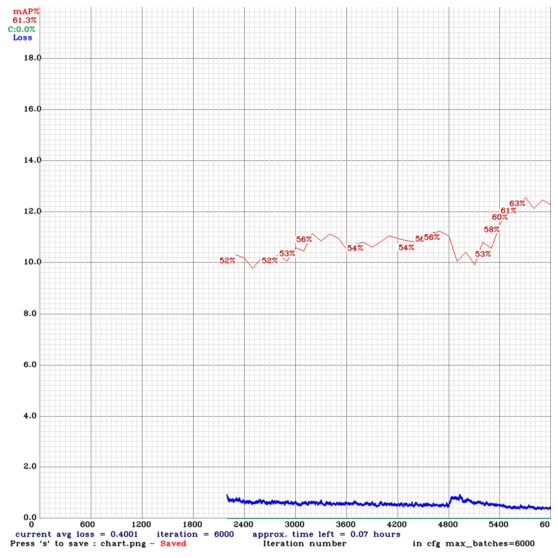

In [7]:
#only works if the training does not get interrupted
imShow('chart.png')

**Check mAP (mean average precision)** Weight number 1000

In [10]:
##You can check the mAP for all the saved weights to see which gives the best results ( xxxx here is the saved weight number like 4000, 5000 or 6000 snd so on )

!./darknet detector map data/yolov2-obj.data cfg/yolov2-custom.cfg /mydrive/yolov2-mask/training/yolov2-custom_1000.weights -points 0

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 max                2x 2/ 2    416 x 416 x  32 ->  208 x 208 x  32 0.006 BF
   2 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   3 max                2x 2/ 2    208 x 208 x  64 ->  104 x 104 x  64 0.003 BF
   4 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   5 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   6 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   7 max                2x 2/ 2    104 x 104 x 128 ->   52 x  52 x 128 

**Check mAP (mean average precision)** Weight number 2000

In [9]:
##You can check the mAP for all the saved weights to see which gives the best results ( xxxx here is the saved weight number like 4000, 5000 or 6000 snd so on )

!./darknet detector map data/yolov2-obj.data cfg/yolov2-custom.cfg /mydrive/yolov2-mask/training/yolov2-custom_2000.weights -points 0

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 max                2x 2/ 2    416 x 416 x  32 ->  208 x 208 x  32 0.006 BF
   2 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   3 max                2x 2/ 2    208 x 208 x  64 ->  104 x 104 x  64 0.003 BF
   4 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   5 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   6 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   7 max                2x 2/ 2    104 x 104 x 128 ->   52 x  52 x 128 

**Check mAP (mean average precision)** Weight number 3000

In [11]:
##You can check the mAP for all the saved weights to see which gives the best results ( xxxx here is the saved weight number like 4000, 5000 or 6000 snd so on )

!./darknet detector map data/yolov2-obj.data cfg/yolov2-custom.cfg /mydrive/yolov2-mask/training/yolov2-custom_3000.weights -points 0

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 max                2x 2/ 2    416 x 416 x  32 ->  208 x 208 x  32 0.006 BF
   2 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   3 max                2x 2/ 2    208 x 208 x  64 ->  104 x 104 x  64 0.003 BF
   4 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   5 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   6 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   7 max                2x 2/ 2    104 x 104 x 128 ->   52 x  52 x 128 

**Check mAP (mean average precision)** Weight number 4000

In [12]:
##You can check the mAP for all the saved weights to see which gives the best results ( xxxx here is the saved weight number like 4000, 5000 or 6000 snd so on )

!./darknet detector map data/yolov2-obj.data cfg/yolov2-custom.cfg /mydrive/yolov2-mask/training/yolov2-custom_4000.weights -points 0

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 max                2x 2/ 2    416 x 416 x  32 ->  208 x 208 x  32 0.006 BF
   2 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   3 max                2x 2/ 2    208 x 208 x  64 ->  104 x 104 x  64 0.003 BF
   4 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   5 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   6 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   7 max                2x 2/ 2    104 x 104 x 128 ->   52 x  52 x 128 

**Check mAP (mean average precision)** Weight number 5000

In [13]:
##You can check the mAP for all the saved weights to see which gives the best results ( xxxx here is the saved weight number like 4000, 5000 or 6000 snd so on )

!./darknet detector map data/yolov2-obj.data cfg/yolov2-custom.cfg /mydrive/yolov2-mask/training/yolov2-custom_5000.weights -points 0

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 max                2x 2/ 2    416 x 416 x  32 ->  208 x 208 x  32 0.006 BF
   2 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   3 max                2x 2/ 2    208 x 208 x  64 ->  104 x 104 x  64 0.003 BF
   4 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   5 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   6 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   7 max                2x 2/ 2    104 x 104 x 128 ->   52 x  52 x 128 

**Check mAP (mean average precision)** Weight number 6000

In [14]:
##You can check the mAP for all the saved weights to see which gives the best results ( xxxx here is the saved weight number like 4000, 5000 or 6000 snd so on )

!./darknet detector map data/yolov2-obj.data cfg/yolov2-custom.cfg /mydrive/yolov2-mask/training/yolov2-custom_6000.weights -points 0

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 max                2x 2/ 2    416 x 416 x  32 ->  208 x 208 x  32 0.006 BF
   2 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   3 max                2x 2/ 2    208 x 208 x  64 ->  104 x 104 x  64 0.003 BF
   4 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   5 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   6 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   7 max                2x 2/ 2    104 x 104 x 128 ->   52 x  52 x 128 

# **12) Test your custom Object Detector**

## **Make changes to your custom config file**
*   change line batch to batch=1
*   change line subdivisions to subdivisions=1

You can do it either manually or by simply running the code below

In [16]:
#set your custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov2-custom.cfg
!sed -i 's/subdivisions=8/subdivisions=1/' yolov2-custom.cfg
%cd ..

/content/gdrive/MyDrive/yolov2-mask/darknet/cfg
/content/gdrive/My Drive/yolov2-mask/darknet


## **Run detector on an image**

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 max                2x 2/ 2    416 x 416 x  32 ->  208 x 208 x  32 0.006 BF
   2 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   3 max                2x 2/ 2    208 x 208 x  64 ->  104 x 104 x  64 0.003 BF
   4 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   5 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   6 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   7 max                2x 2/ 2    104 x 104 x 128 ->   52 x  52 x 128 

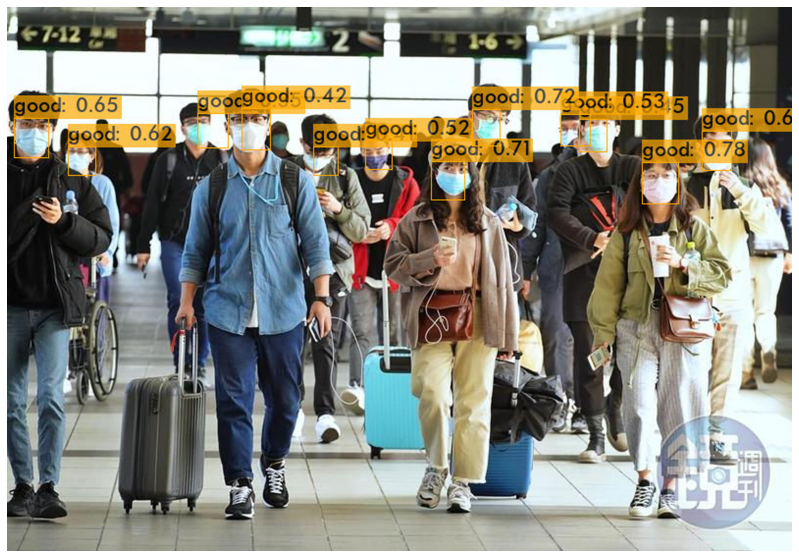

In [17]:
# run your custom detector with this command (upload an image to your google drive to test, the thresh flag sets the minimum accuracy required for object detection)

!./darknet detector test data/yolov2-obj.data cfg/yolov2-custom.cfg /mydrive/yolov2-mask/training/yolov2-custom_best.weights /mydrive/yolov2-mask/test_images/676.jpeg -thresh 0.3 
imShow('predictions.jpg')

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 max                2x 2/ 2    416 x 416 x  32 ->  208 x 208 x  32 0.006 BF
   2 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   3 max                2x 2/ 2    208 x 208 x  64 ->  104 x 104 x  64 0.003 BF
   4 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   5 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   6 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   7 max                2x 2/ 2    104 x 104 x 128 ->   52 x  52 x 128 

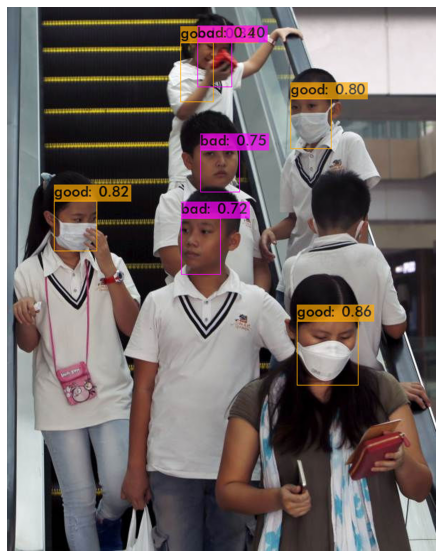

In [19]:
# run your custom detector with this command (upload an image to your google drive to test, the thresh flag sets the minimum accuracy required for object detection)

!./darknet detector test data/yolov2-obj.data cfg/yolov2-custom.cfg /mydrive/yolov2-mask/training/yolov2-custom_best.weights /mydrive/yolov2-mask/test_images/677.jpg -thresh 0.3 
imShow('predictions.jpg')

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 max                2x 2/ 2    416 x 416 x  32 ->  208 x 208 x  32 0.006 BF
   2 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   3 max                2x 2/ 2    208 x 208 x  64 ->  104 x 104 x  64 0.003 BF
   4 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   5 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   6 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   7 max                2x 2/ 2    104 x 104 x 128 ->   52 x  52 x 128 

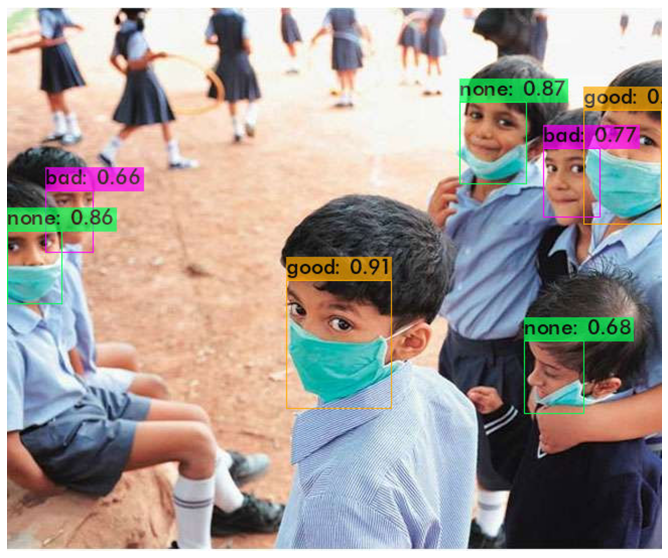

In [20]:
# run your custom detector with this command (upload an image to your google drive to test, the thresh flag sets the minimum accuracy required for object detection)

!./darknet detector test data/yolov2-obj.data cfg/yolov2-custom.cfg /mydrive/yolov2-mask/training/yolov2-custom_best.weights /mydrive/yolov2-mask/darknet/data/obj/32.jpg -thresh 0.3 
imShow('predictions.jpg')

## **Run detector on a live webcam**

if you want to run this notebook mask detection use yolov2 darknet, you can download my results of training own dataset in this : [yolov2-custom_best.weights](https://drive.google.com/file/d/1zvrbtfrSb37Cly19wH9Q5wfI7CvMECp4/view?usp=sharing).

In [5]:
# Code from theAIGuysCode Github (https://github.com/theAIGuysCode/YOLOv4-Cloud-Tutorial/blob/master/yolov4_webcam.ipynb)
# Adjusted for my custom YOLOv2 trained weights, config and obj.data files

# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import matplotlib.pyplot as plt
%matplotlib inline


# import darknet functions to perform object detections
from darknet import *
# load in our YOLOv4 architecture network
network, class_names, class_colors = load_network("cfg/yolov2-custom.cfg", "data/yolov2-obj.data", "/mydrive/yolov2-mask/training/yolov2-custom_best.weights")
width = network_width(network)
height = network_height(network)

# darknet helper function to run detection on image
def darknet_helper(img, width, height):
  darknet_image = make_image(width, height, 3)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_resized = cv2.resize(img_rgb, (width, height),
                              interpolation=cv2.INTER_LINEAR)

  # get image ratios to convert bounding boxes to proper size
  img_height, img_width, _ = img.shape
  width_ratio = img_width/width
  height_ratio = img_height/height

  # run model on darknet style image to get detections
  copy_image_from_bytes(darknet_image, img_resized.tobytes())
  detections = detect_image(network, class_names, darknet_image)
  free_image(darknet_image)
  return detections, width_ratio, height_ratio

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes  

# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # call our darknet helper on video frame
    detections, width_ratio, height_ratio = darknet_helper(frame, width, height)

    # loop through detections and draw them on transparent overlay image
    for label, confidence, bbox in detections:
      left, top, right, bottom = bbox2points(bbox)
      left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
      bbox_array = cv2.rectangle(bbox_array, (left, top), (right, bottom), class_colors[label], 2)
      bbox_array = cv2.putText(bbox_array, "{} [{:.2f}]".format(label, float(confidence)),
                        (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        class_colors[label], 2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes   

<IPython.core.display.Javascript object>